<a href="https://colab.research.google.com/github/BMesc/MachineLearningAnalistIGTI/blob/main/analise_pressao_atmosfericaMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
uri = "https://raw.githubusercontent.com/PacktPublishing/Practical-Time-Series-Analysis/master/Data%20Files/PRSA_data_2010.1.1-2014.12.31.csv"

In [ ]:
df_poluicao_beijing = pd.read_csv(uri)

In [ ]:
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df_poluicao_beijing.shape

(43824, 13)

In [ ]:
df_poluicao_beijing['datetime'] = df_poluicao_beijing[['year','month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'],month=row['month'],day=row['day'],hour=row['hour']),axis=1)

In [ ]:
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [ ]:
df_pressao_atm = df_poluicao_beijing[['datetime','PRES']]
df_pressao_atm.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [ ]:
df_pressao_atm.sort_values('datetime', ascending=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_pressao_atm.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [ ]:
df_serie_temporal=df_pressao_atm.set_index('datetime')

In [ ]:
df_serie_temporal.columns

Index(['PRES'], dtype='object')

In [ ]:
df_serie_temporal.head()

,PRES
datetime,
2010-01-01 00:00:00,1021.0
2010-01-01 01:00:00,1020.0
2010-01-01 02:00:00,1019.0
2010-01-01 03:00:00,1019.0
2010-01-01 04:00:00,1018.0


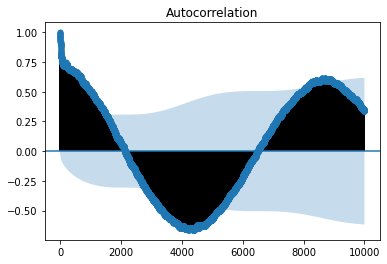

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_serie_temporal, lags=10000)
plt.show()

In [ ]:
df_pressao_atm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 0 to 43823
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  43824 non-null  datetime64[ns]
 1   PRES      43824 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_pressao_atm['PRES_normalizado'] = scaler.fit_transform(np.array(df_pressao_atm['PRES']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#dividindo em treino e teste
data_de_corte = datetime.datetime(year=2014,month=1,day=1,hour=0)
df_treinamento=df_pressao_atm.loc[df_pressao_atm['datetime']<data_de_corte]
df_teste=df_pressao_atm.loc[df_pressao_atm['datetime']>=data_de_corte]

df_teste.shape

(8760, 3)

In [ ]:
def formata_entrada_saida(serie_temporal_original,numero_de_passos):
  X = []
  y = []
  for i in range(numero_de_passos, serie_temporal_original.shape[0]):
    X.append(list(serie_temporal_original.loc[i-numero_de_passos:i-1]))
    y.append(serie_temporal_original.loc[i])
  X, y = np.array(X), np.array(y)
  return X, y

In [ ]:
X_train, y_train = formata_entrada_saida(df_treinamento['PRES_normalizado'], 400)

In [ ]:
X_teste, y_teste = formata_entrada_saida(df_teste['PRES_normalizado'].reset_index(drop=True), 400)
X_teste.shape

(8360, 400)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
camada_entrada = Input(shape=(400,), dtype='float32')

In [ ]:
densa1 = Dense(32, activation='linear')(camada_entrada)
densa2 = Dense(16, activation='linear')(densa1)
densa3 = Dense(16, activation='linear')(densa2)

In [ ]:
camada_dropout = Dropout(0.2)(densa3)

In [ ]:
camada_de_saida = Dense(1, activation='linear')(camada_dropout)

In [ ]:
modelo_MLP = tf.keras.Model(inputs=camada_entrada, outputs=camada_de_saida)

In [ ]:
modelo_MLP.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 13,649
Trainable params: 13,649
Non-trainable params: 0
_______________________________________________________

In [ ]:
modelo_MLP.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
modelo_MLP.fit(x=X_train, y=y_train, batch_size=16, epochs=20, verbose=1,shuffle=True)

Epoch 1/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0165
Epoch 2/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0038
Epoch 3/20
2167/2167 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 4/20
2167/2167 [==============================] - 4s 2ms/step - loss: 0.0016
Epoch 5/20
2167/2167 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 6/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 7/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 8/20
2167/2167 [==============================] - 3s 2ms/step - loss: 0.0010
Epoch 9/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 10/20
2167/2167 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 11/20
2167/2167 [==============================] - 3s 1ms/step - loss: 9.4698e-04
Epoch 12/20
2167/2167 [==============================] - 4s 2ms/step - loss: 9.59

In [ ]:
previsao = modelo_MLP.predict(X_teste)
previsao_PRES = scaler.inverse_transform(previsao)
previsao_PRES.shape

(8360, 1)

In [ ]:
previsao_PRES = np.squeeze(previsao_PRES)
previsao_PRES.shape

(8360,)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df_teste['PRES'].iloc[400:], previsao_PRES)
print('Coeficiente de determinação para o teste (MLP):', round(r2,4))

Coeficiente de determinação para o teste (MLP): 0.993


Text(0.5, 0, 'Indice')

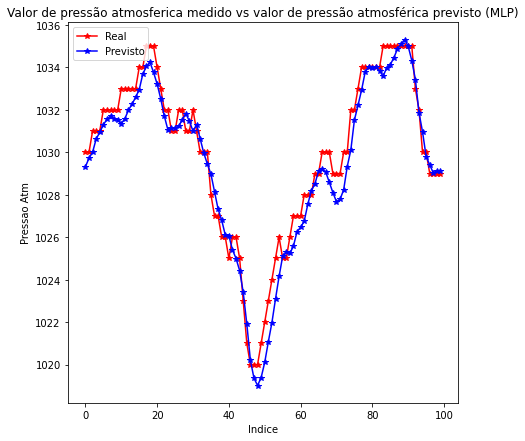

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(range(100),df_teste['PRES'].iloc[400:500],linestyle='-',marker='*',color='r')
plt.plot(range(100), previsao_PRES[:100],linestyle='-',marker='*',color='b')
plt.legend(['Real','Previsto'], loc=2)
plt.title('Valor de pressão atmosferica medido vs valor de pressão atmosférica previsto (MLP)')
plt.ylabel('Pressao Atm')
plt.xlabel('Indice')